<a href="https://colab.research.google.com/github/4gzjw4dq7h-coder/SDRIS-Simulation-Library/blob/main/geometric_tunneling_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Berechne High-Res Simulation für Alpha=1.6...
Grafik gespeichert als: p_adic_simulation.png


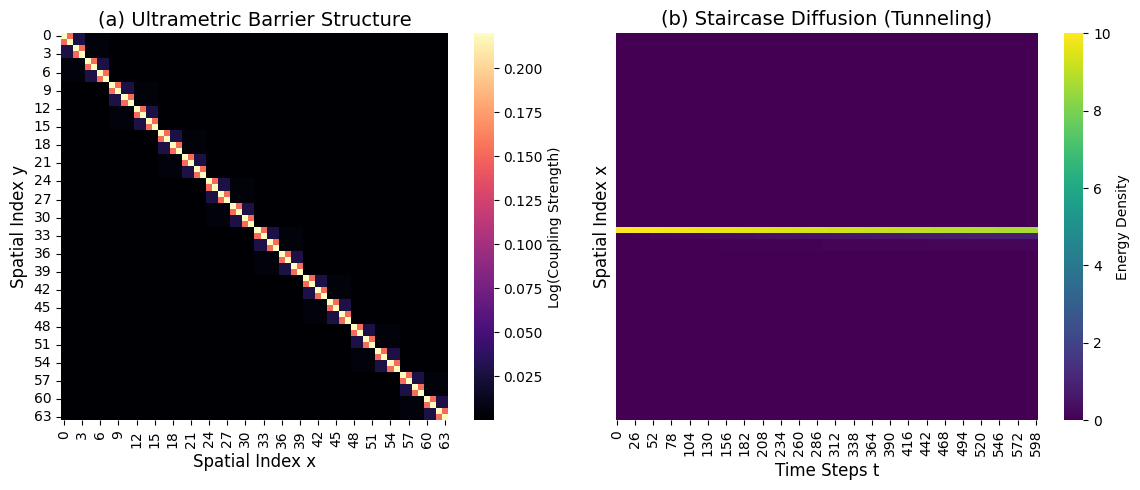

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- PARAMETER FÜR PUBLIKATION ---
# Alpha = 1.6 ist der "Sweet Spot":
# Sicher über 1.5, aber nah genug an der Grenze,
# um den "Treppen-Effekt" (Tunneling) deutlich zu zeigen.
PUBLICATION_ALPHA = 1.6

# --- FUNKTIONEN (Identisch zur Sicherheits-Version) ---
def get_p_adic_metric(n_points, p=2):
    dist_matrix = np.zeros((n_points, n_points))
    for i in range(n_points):
        for j in range(n_points):
            if i == j:
                dist_matrix[i, j] = 0
                continue
            diff = i ^ j
            k = 0
            while (1 << (k + 1)) <= diff:
                k += 1
            dist_matrix[i, j] = p**(k + 1)
    return dist_matrix

def build_vladimirov_operator(n_points, alpha, p=2):
    dists = get_p_adic_metric(n_points, p)
    matrix = np.zeros((n_points, n_points))
    with np.errstate(divide='ignore'):
        matrix = 1.0 / (dists ** (1 + alpha))
    np.fill_diagonal(matrix, 0)
    for i in range(n_points):
        matrix[i, i] = -np.sum(matrix[i, :])
    return matrix

# --- SIMULATION ---
p = 2
k_depth = 6
N = p**k_depth
dt = 0.001
steps = 600     # Etwas länger, um mehr Stufen zu zeigen

print(f"Berechne High-Res Simulation für Alpha={PUBLICATION_ALPHA}...")

L = build_vladimirov_operator(N, PUBLICATION_ALPHA, p)

# Startbedingung: Energie-Spike in der Mitte
u = np.zeros(N)
u[N//2] = 10.0
history = [u.copy()]

# Zeit-Evolution
for _ in range(steps):
    du = np.dot(L, u)
    u = u + dt * du
    history.append(u.copy())

history = np.array(history)

# --- PLOTTING FÜR PAPER (High DPI) ---
# Wir erstellen ein kombiniertes Bild, das perfekt in die Breite einer A4-Seite passt.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot A: Die Barrieren (Matrix)
sns.heatmap(np.log1p(np.abs(L)), cmap="magma", square=True, ax=axes[0],
            cbar_kws={'label': 'Log(Coupling Strength)'})
axes[0].set_title("(a) Ultrametric Barrier Structure", fontsize=14)
axes[0].set_xlabel("Spatial Index x", fontsize=12)
axes[0].set_ylabel("Spatial Index y", fontsize=12)

# Plot B: Das Tunneln (Diffusion)
sns.heatmap(history.T, cmap="viridis", ax=axes[1],
            cbar_kws={'label': 'Energy Density'})
axes[1].set_title("(b) Staircase Diffusion (Tunneling)", fontsize=14)
axes[1].set_xlabel("Time Steps t", fontsize=12)
axes[1].set_ylabel("Spatial Index x", fontsize=12)
axes[1].set_yticks([]) # Keine Y-Ticks nötig, da Indizes abstrakt sind

plt.tight_layout()

# SPEICHERN
filename = "p_adic_simulation.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Grafik gespeichert als: {filename}")
plt.show()